In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

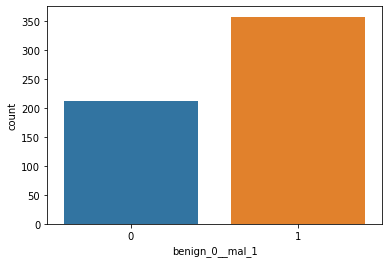

In [6]:
# See if there is a good balance between benign and malignant tumors for model training
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

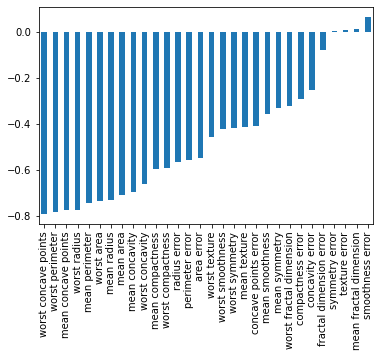

In [13]:
df.corr()['benign_0__mal_1'].sort_values().drop('benign_0__mal_1').plot(kind='bar')

<AxesSubplot:>

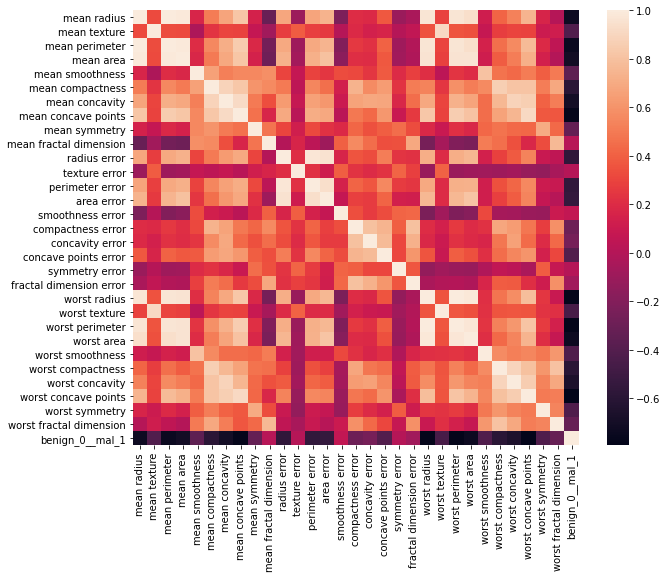

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values

In [20]:
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense, Activation, Dropout

In [35]:
# Number of neurons in each layer is based on number of features
X_train.shape

(426, 30)

In [49]:
model = Sequential()

In [50]:
model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
# This is an example of choosing too many epochs and overfitting

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 43ms/step - loss: 0.7135 - val_loss: 0.6862
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6720 - val_loss: 0.6562
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6500 - val_loss: 0.6235
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6130 - val_loss: 0.5879
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5697 - val_loss: 0.5501
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5356 - val_loss: 0.5099
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5076 - val_loss: 0.4668
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4498 - val_loss: 0.4224
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4146 - val_loss: 0.3819
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3578 - val_loss: 0.3439
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.1191
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.1249
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0672 - val_loss: 0.1192
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.1208
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.1201
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.1247
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.1238
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0623 - val_loss: 0.1195
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.1270
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.1204
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.1372
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.1335
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.1413
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.1298
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.1425
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.1398
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.1409
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.1346
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0308 - val_loss: 0.1371
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.1371
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.1390
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.1431
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.1423
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.1420
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.1528
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0321 - val_loss: 0.1343
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.1457
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.1498
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.1379
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.1535
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0210 - val_loss: 0.1452
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.1673
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.1513
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.1696
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1434
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1701
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.1499
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.1546
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.1581
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.1541
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1663
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1791
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.1602
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.1737
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1701
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1681
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.1762
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.1720
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.1760
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.1592
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.1816
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.1843
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1919
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1852
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.1830
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.2059
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.1835
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.1939
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.1749
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.2000
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.2478
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.1983
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.2363
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.2288
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.2147
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.2133
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.2395
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.2270
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.2139
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.2214
Epoc

In [37]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

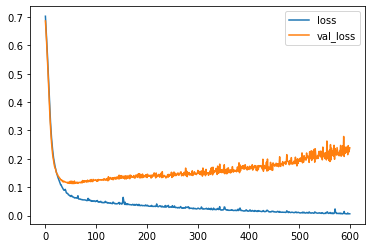

In [38]:
losses.plot()

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [46]:
# Using early stopping to avoid overfitting
# after re-instantiated the model

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6960 - val_loss: 0.6583
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6491 - val_loss: 0.6161
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6047 - val_loss: 0.5513
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5438 - val_loss: 0.4879
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4824 - val_loss: 0.4301
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4355 - val_loss: 0.3856
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3955 - val_loss: 0.3457
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3615 - val_loss: 0.3120
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3154 - val_loss: 0.2846
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3032 - val_loss: 0.2595
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0689 - val_loss: 0.1095
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.1118
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0478 - val_loss: 0.1078
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.1157
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0547 - val_loss: 0.1057
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.1176
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0640 - val_loss: 0.1072
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0589 - val_loss: 0.1126
Epoch 00090: early stopping


In [47]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

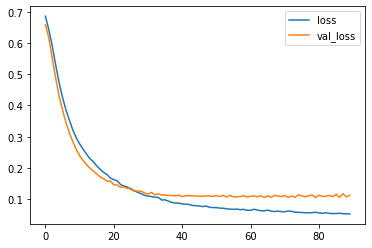

In [48]:
model_loss.plot()

In [51]:
# Another way to avoid overfitting is to add dropout layers

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # half of these neurons will be turned off randomly during each batch

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
# Using early stopping and dropout layers to avoid overfitting
# after re-instantiated the model

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7678 - val_loss: 0.6866
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6946 - val_loss: 0.6544
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6720 - val_loss: 0.6354
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6547 - val_loss: 0.6231
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6295 - val_loss: 0.6021
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6436 - val_loss: 0.5773
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6202 - val_loss: 0.5514
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5841 - val_loss: 0.5241
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5677 - val_loss: 0.5011
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5263 - val_loss: 0.4765
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1252 - val_loss: 0.1068
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1296 - val_loss: 0.1047
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1187 - val_loss: 0.1040
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1157
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0977 - val_loss: 0.0971
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 0.1000
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1326 - val_loss: 0.1168
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.0992
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1353 - val_loss: 0.1032
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1011


<AxesSubplot:>

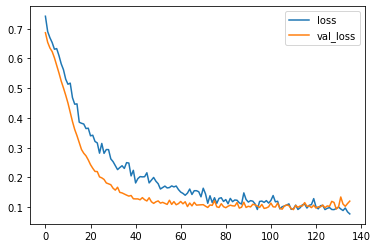

In [53]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
predictions = model.predict_classes(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 4 84]]
